In [222]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [223]:
data_org = pd.read_csv("smoke_detection_iot.csv")
data_org.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [224]:
data_org.drop(['Unnamed: 0','UTC', 'CNT'], axis = 1, inplace = True)

In [225]:
data_org['Fire Alarm'] = data_org['Fire Alarm'].astype('category')

In [226]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_org, test_size=0.2, random_state=42)

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
import statsmodels.api as sm
x = train.drop('Fire Alarm', axis = 1)
xcols = x.columns

# Logistic Regresstion

In [229]:
logit_model=sm.Logit(train['Fire Alarm'],x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.269558
         Iterations 12
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.549     
Dependent Variable:   Fire Alarm       AIC:              27035.8892
Date:                 2023-09-16 22:08 BIC:              27141.7514
No. Observations:     50104            Log-Likelihood:   -13506.   
Df Model:             11               LL-Null:          -29942.   
Df Residuals:         50092            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       12.0000                                      
-------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
-------------------------------------------------------------------
Temperature[C]  -0.0475   0.0015 -32.1202 0.0000   -0.0504  -0.0446
Humidity[%]     -0.0218   0.0024  -9.000

In [230]:
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(x.drop('PM2.5', axis=1), train['Fire Alarm'])

LogisticRegression()

In [231]:
# Evaluate logistic regression model
X_test = test[xcols].drop('PM2.5', axis=1)
y_pred_logreg = logreg.predict(X_test)
print('Logistic Regression:')
print('Accuracy: {:.2f}'.format(logreg.score(X_test, test['Fire Alarm'])))
print(classification_report(test['Fire Alarm'], y_pred_logreg))

Logistic Regression:
Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      3594
           1       0.87      0.98      0.93      8932

    accuracy                           0.89     12526
   macro avg       0.91      0.81      0.85     12526
weighted avg       0.89      0.89      0.88     12526



# Logistic Regression with Regularization Techniques

In [232]:
x_train = train[xcols]
y_train=train['Fire Alarm']

xcols = x_train.columns

In [233]:
x_test = test[xcols]
y_test = test['Fire Alarm']

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Logistic Regression with Ridge

In [235]:
# Fit Ridge logistic regression model
ridge = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
ridge.fit(x_train, y_train)

# Predict using Ridge logistic regression model
y_pred_ridge = ridge.predict(x_test)

In [236]:
# Print Ridge regression coefficients
print("Ridge Regression Coefficients:")
for feature, coef in zip(xcols, ridge.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Ridge Regression Coefficients:
Temperature[C]: -0.0464
Humidity[%]: -0.0185
TVOC[ppb]: -0.0014
eCO2[ppm]: 0.0020
Raw H2: 0.0069
Raw Ethanol: -0.0088
Pressure[hPa]: 0.0932
PM1.0: 0.0000
PM2.5: 0.0000
NC0.5: -0.0000
NC1.0: 0.0000
NC2.5: -0.0000


In [237]:
# Print the intercept
print(f"Intercept: {ridge.intercept_[0]:.4f}")

Intercept: 0.0002


In [238]:
coefficients = ridge.coef_[0]  
print("Variables with small coefficients:")
for feature, coef in zip(xcols, coefficients):
    if abs(coef) < threshold:
        print(f"{feature}: {coef:.4f}")


Variables with small coefficients:
TVOC[ppb]: -0.0014
eCO2[ppm]: 0.0020
Raw H2: 0.0069
Raw Ethanol: -0.0088
PM1.0: 0.0000
PM2.5: 0.0000
NC0.5: -0.0000
NC1.0: 0.0000
NC2.5: -0.0000


In [239]:
# Evaluate Ridge regression model
print('Ridge Regression:')
print('Accuracy: {:.2f}'.format(np.mean(y_pred_ridge == test['Fire Alarm'])))
print(classification_report(test['Fire Alarm'], y_pred_ridge))

Ridge Regression:
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      3594
           1       0.87      0.98      0.92      8932

    accuracy                           0.88     12526
   macro avg       0.90      0.81      0.84     12526
weighted avg       0.89      0.88      0.87     12526



## Logistic Regression with Lasso

In [240]:
# Fit Lasso logistic regression model
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [241]:
# Print Lasso regression coefficients
print("Lasso Regression Coefficients:")
for feature, coef in zip(xcols, lasso.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Lasso Regression Coefficients:
Temperature[C]: -0.0251
Humidity[%]: 0.0383
TVOC[ppb]: -0.0003
eCO2[ppm]: 0.0005
Raw H2: 0.0017
Raw Ethanol: -0.0029
Pressure[hPa]: 0.0183
PM1.0: -0.0001
PM2.5: 0.0001
NC0.5: -0.0000
NC1.0: -0.0000
NC2.5: -0.0000


In [242]:
# Predict using Lasso logistic regression model
y_pred_lasso = lasso.predict(x_test)

# Evaluate Lasso logistic regression model
print('Lasso Regression:')
print('Accuracy: {:.2f}'.format(np.mean(y_pred_lasso == test['Fire Alarm'])))
print(classification_report(test['Fire Alarm'], y_pred_lasso))

Lasso Regression:
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.94      0.62      0.75      3594
           1       0.87      0.98      0.92      8932

    accuracy                           0.88     12526
   macro avg       0.90      0.80      0.84     12526
weighted avg       0.89      0.88      0.87     12526



## Logistic Regression with Elastic Net

In [243]:
# Fit Elastic Net logistic regression model
elastic_net = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)
elastic_net.fit(x_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [244]:
# Print ElasticNet regression coefficients
print ("ElasticNet Regression Coefficients:")
for feature, coef in zip(xcols, elastic_net.coef_[0]):
    print(f"{feature}: {coef:.4f}")

ElasticNet Regression Coefficients:
Temperature[C]: -0.0005
Humidity[%]: 0.0005
TVOC[ppb]: -0.0007
eCO2[ppm]: 0.0014
Raw H2: 0.0077
Raw Ethanol: -0.0051
Pressure[hPa]: 0.0017
PM1.0: -0.0000
PM2.5: -0.0000
NC0.5: -0.0001
NC1.0: -0.0000
NC2.5: 0.0000


In [245]:
# Predict using Elastic Net logistic regression model
y_pred_elastic_net = elastic_net.predict(x_test)

# Evaluate Elastic Net logistic regression model
print('Elastic Net Regression:')
print('Accuracy: {:.2f}'.format(np.mean(y_pred_elastic_net == test['Fire Alarm'])))
print(classification_report(test['Fire Alarm'], y_pred_elastic_net))

Elastic Net Regression:
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.95      0.63      0.75      3594
           1       0.87      0.99      0.92      8932

    accuracy                           0.88     12526
   macro avg       0.91      0.81      0.84     12526
weighted avg       0.89      0.88      0.87     12526



#### Confusion matrices for all models

In [246]:
cm_ridge = confusion_matrix(test['Fire Alarm'], y_pred_ridge)
cm_lasso = confusion_matrix(test['Fire Alarm'], y_pred_lasso)
cm_elastic_net = confusion_matrix(test['Fire Alarm'], y_pred_elastic_net)

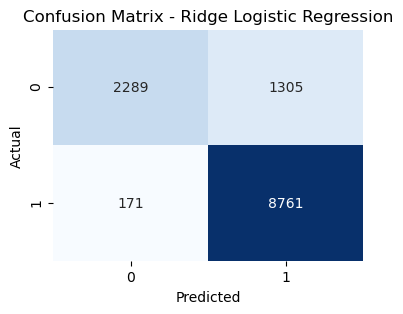

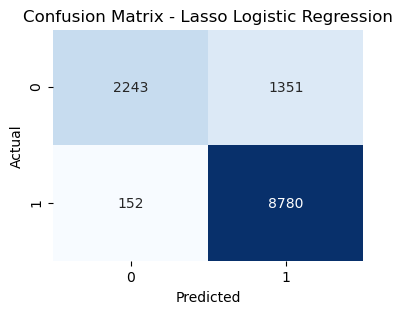

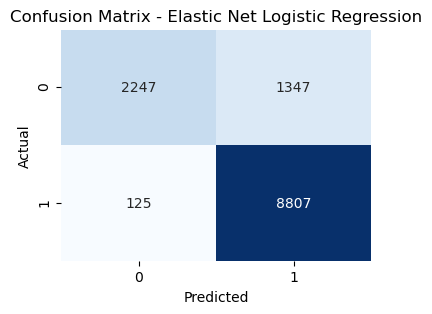

In [247]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot confusion matrices for Ridge, Lasso, and Elastic Net
plot_confusion_matrix(test['Fire Alarm'], y_pred_ridge, 'Ridge Logistic Regression')
plot_confusion_matrix(test['Fire Alarm'], y_pred_lasso, 'Lasso Logistic Regression')
plot_confusion_matrix(test['Fire Alarm'], y_pred_elastic_net, 'Elastic Net Logistic Regression')

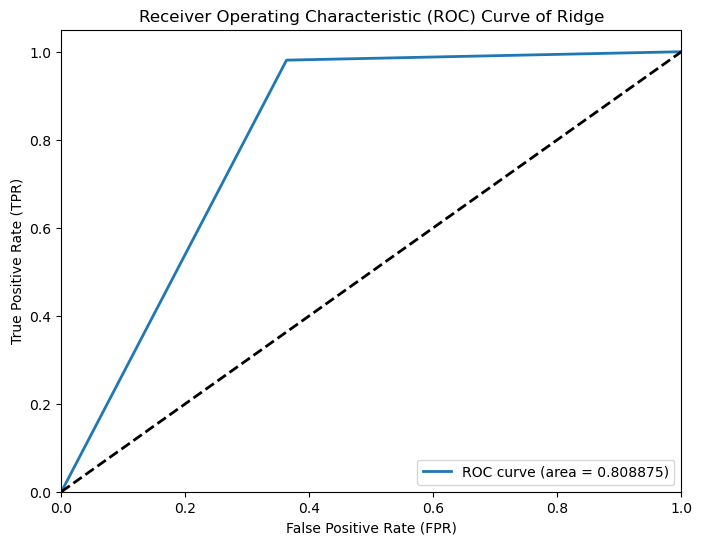

roc value 0.8088750881264266


In [248]:
#ROC curve for Ridge
y_prob_ridge = ridge.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ridge)
roc_auc = roc_auc_score(y_test, y_prob_ridge)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve of Ridge')
plt.legend(loc='lower right')
plt.show()

print("roc value", roc_auc)

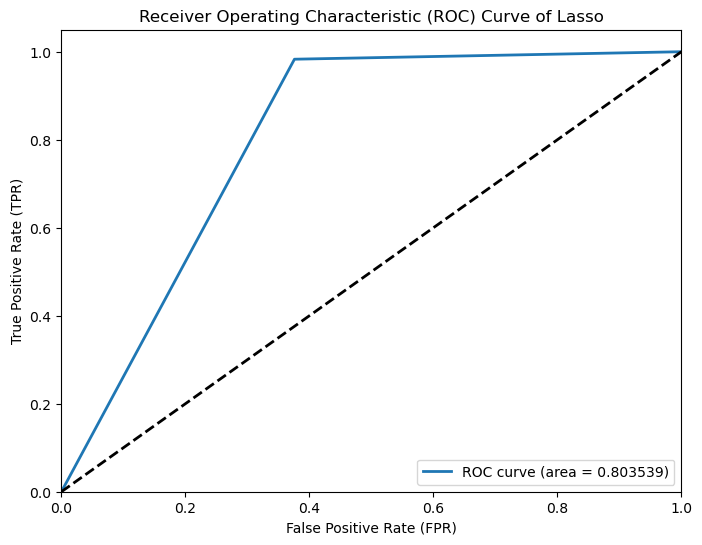

roc value 0.8035391248936814


In [249]:
#ROC curve for Lasso
y_prob_lasso = lasso.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lasso)
roc_auc = roc_auc_score(y_test, y_prob_lasso)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve of Lasso')
plt.legend(loc='lower right')
plt.show()

print("roc value", roc_auc)

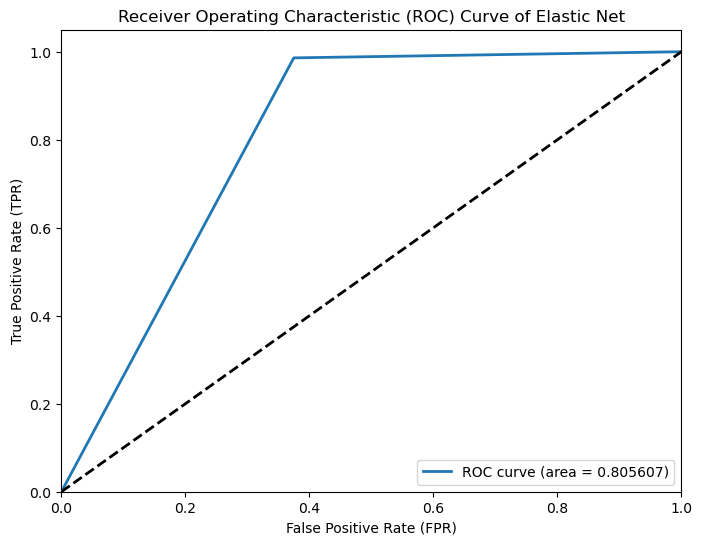

roc value 0.8056070275358169


In [250]:
#ROC curve for Elastic Net
y_prob_elasticnet = elastic_net.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob_elasticnet)
roc_auc = roc_auc_score(y_test, y_prob_elasticnet)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve of Elastic Net')
plt.legend(loc='lower right')
plt.show()

print("roc value", roc_auc)